# 1. Set up
## 1.1 Loading packages

In [745]:
%pip list

Package                   Version
------------------------- -----------
altair                    5.2.0
api                       0.0.7
appnope                   0.1.3
asttokens                 2.4.1
attrs                     23.2.0
beniget                   0.4.1
blinker                   1.7.0
branca                    0.8.1
CacheControl              0.13.1
cachetools                5.3.2
certifi                   2023.11.17
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cocos2d                   0.6.10
comm                      0.2.1
contourpy                 1.1.0
cryptography              41.0.7
cycler                    0.11.0
Cython                    3.0.0
debugpy                   1.8.0
decorator                 5.1.1
duckdb                    0.9.2
empiricaldist             0.8.0
et-xmlfile                1.1.0
exceptiongroup            1.2.0
executing                 2.0.1
firebase-admin            6.3.0
folium               

In [746]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
import seaborn as sns
from empiricaldist import Pmf

## 1.2 Loading dataset
1. found and printed the table name
2. query and store datad in df and display the head

In [747]:
conn = sqlite3.connect('data/agri.db')
cursor = conn.cursor()

# printing table names 
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
table = tables[0][0]
print("table name: " + table)


df = pd.read_sql_query(f"SELECT * FROM {table}", conn)
conn.close()
df.head(20)

table name: farm_data


,System Location Code,Previous Cycle Plant Type,Plant Type,Plant Stage,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm)
0,Zone_D,Herbs,Vine Crops,Maturity,23.34,NaN,454.0,937,1.82,4,161,64,201,6.1,28.150346
1,Zone_G,Herbs,VINE CROPS,Vegetative,-24.16,63.14,441.0,938,2.13,6,161,53,None,6.5,31.000000
2,Zone_F,Herbs,herbs,maturity,23.84,NaN,562.0,1246,1.21,8,228,79,292,6.4,26.000000
3,Zone_G,Herbs,fruiting vegetables,Vegetative,22.61,NaN,651.0,1346,1.96,6,None,53 ppm,289,6.6,NaN
4,Zone_B,Vine Crops,LEAFY GREENS,seedling,22.88,NaN,144.0,812,2.76,5,61,19,168,5.5,28.000000
5,Zone_C,Vine Crops,FRUITING VEGETABLES,MATURITY,25.96,NaN,675.0,1338,1.75,8,227,53,258,6.2,23.092135
6,Zone_A,Leafy Greens,Vine Crops,Maturity,NaN,NaN,514.0,1103,1.14,8,174,62,217,5.5,35.000000
7,Zone_G,Herbs,Leafy Greens,Maturity,20.16,NaN,317.0,1133,1.52,10,None,None,277,5.8,39.611156
8,Zone_G,Herbs,Leafy Greens,Maturity,20.16,NaN,317.0,1133,1.52,10,None,None,277,5.8,39.611156
9,Zone_B,Vine Crops,Vine Crops,MATURITY,25.59,NaN,435.0,845,2.07,8,150,70,210,5.3,27.835062


# 2. Basic Exploration & Data Cleaning
## 2.1 Basic Exploration

In [748]:
df.shape

(57489, 15)

57489 samples with 15 variables

In [749]:
df.columns

Index(['System Location Code', 'Previous Cycle Plant Type', 'Plant Type',
       'Plant Stage', 'Temperature Sensor (°C)', 'Humidity Sensor (%)',
       'Light Intensity Sensor (lux)', 'CO2 Sensor (ppm)', 'EC Sensor (dS/m)',
       'O2 Sensor (ppm)', 'Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)',
       'Nutrient K Sensor (ppm)', 'pH Sensor', 'Water Level Sensor (mm)'],
      dtype='object')

Column names be more readable and easier to use if we convert all to snake_case.

In [750]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  object 
 11  Nutrient P Sensor (ppm)       51791 non-null  object 
 12  Nutrient K Sensor (ppm)       53788 non-null  object 
 13  p

There are **15 columns** and a few have missing values. So now we check the **null count**.

Objects which should have numerical data type but are object according to the description:  **10  Nutrient N Sensor (ppm), 11  Nutrient P Sensor (ppm), 12  Nutrient K Sensor (ppm)**

**Categorical variables identified (both ordered & unordered):** System Location Code, Previous Cycle Plant Type, Plant Type, Plant Stage 

In [751]:
df.isnull().sum()   

System Location Code                0
Previous Cycle Plant Type           0
Plant Type                          0
Plant Stage                         0
Temperature Sensor (°C)          8689
Humidity Sensor (%)             38867
Light Intensity Sensor (lux)     4278
CO2 Sensor (ppm)                    0
EC Sensor (dS/m)                    0
O2 Sensor (ppm)                     0
Nutrient N Sensor (ppm)          9974
Nutrient P Sensor (ppm)          5698
Nutrient K Sensor (ppm)          3701
pH Sensor                           0
Water Level Sensor (mm)          8642
dtype: int64

In [752]:
# Computing percentage of missing data for each column
missing_percentage = (df.isna().sum() / len(df)) * 100

# Creating dataframe for displaying the percentage of missing data for each column
missing_data = pd.DataFrame({'Missing %': missing_percentage})
print(missing_data)


                              Missing %
System Location Code           0.000000
Previous Cycle Plant Type      0.000000
Plant Type                     0.000000
Plant Stage                    0.000000
Temperature Sensor (°C)       15.114196
Humidity Sensor (%)           67.607716
Light Intensity Sensor (lux)   7.441424
CO2 Sensor (ppm)               0.000000
EC Sensor (dS/m)               0.000000
O2 Sensor (ppm)                0.000000
Nutrient N Sensor (ppm)       17.349406
Nutrient P Sensor (ppm)        9.911461
Nutrient K Sensor (ppm)        6.437753
pH Sensor                      0.000000
Water Level Sensor (mm)       15.032441


Humidity Sensor (%) has the highest % of nulls **(67.607716%)** while the rest of the null count fall under 20%

Now, I will perform EDA on **categorical variables identified**: System Location Code, Previous Cycle Plant Type, Plant Type, Plant Stage 

### 2.1.1 Categorical Variables

In [753]:
print(df['System Location Code'].value_counts())

System Location Code
Zone_B    8296
Zone_G    8287
Zone_E    8272
Zone_C    8268
Zone_F    8156
Zone_A    8148
Zone_D    8062
Name: count, dtype: int64


In [754]:
print(df['Previous Cycle Plant Type'].value_counts())

Previous Cycle Plant Type
Fruiting Vegetables    14481
Leafy Greens           14446
Vine Crops             14305
Herbs                  14257
Name: count, dtype: int64


In [755]:
print(df['Plant Type'].value_counts())

Plant Type
Fruiting Vegetables    10137
Herbs                  10059
Leafy Greens            9968
Vine Crops              9921
leafy greens            2241
HERBS                   2239
LEAFY GREENS            2183
VINE CROPS              2173
vine crops              2163
FRUITING VEGETABLES     2154
fruiting vegetables     2128
herbs                   2123
Name: count, dtype: int64


Some categories have the **same name but with different capitalisation** so we need to standardise them later

For e.g FRUITING VEGETABLES, fruiting vegetables and Fruiting Vegetables are the same variable 

In [756]:
print(df['Plant Stage'].value_counts())

Plant Stage
Seedling      13440
Vegetative    13364
Maturity      13330
SEEDLING       3048
seedling       2937
maturity       2899
VEGETATIVE     2889
vegetative     2809
MATURITY       2773
Name: count, dtype: int64


Same concern as "Plant Type". But Plant Stage is an ordered categorical variable, **seedling -> vegetative -> maturity**

### Numerical Variables

Describing the numerical variables

In [757]:
df.describe()

,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),pH Sensor,Water Level Sensor (mm)
count,48800.000000,18622.000000,53211.000000,57489.000000,57489.000000,57489.000000,57489.000000,48847.000000
mean,22.138201,69.243535,397.841668,1083.376576,1.624435,6.580842,6.021446,25.716878
std,7.556981,5.725973,222.923860,172.570351,0.415535,1.145534,0.400251,5.815294
min,-28.570000,59.220000,-799.000000,799.000000,-0.250000,3.000000,3.800000,10.001955
25%,22.140000,64.340000,257.000000,950.000000,1.360000,6.000000,5.800000,21.313361
50%,23.210000,68.700000,403.000000,1071.000000,1.650000,7.000000,6.000000,26.000000
75%,24.350000,74.117500,553.000000,1178.000000,1.900000,7.000000,6.300000,30.000000
max,28.750000,81.140000,800.000000,1500.000000,3.440000,11.000000,7.800000,39.998717


Most of the numerical variables are within a sensible range. Except Light Intensity Sensor where the min is -799 while the median/mean lies around 400. 

### 2.1.3 Summary of observations/issues
1. convert cols to **snake_case**
2. merge categories with the same name 
3. incorrect data type for the nutrients 
4. light intensity should not be negative 
4. handle null values
5. new col -> plant_type_stage as per required by the problem statement

## 2.2 Data Cleaning
stored in new data frame clean_df

### 2.2.1 snake_case conversion

In [758]:
clean_df = df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns')

checking if column names are converted successfully

In [759]:
clean_df.columns

Index(['system_location_code', 'previous_cycle_plant_type', 'plant_type',
       'plant_stage', 'temperature_sensor_(°c)', 'humidity_sensor_(%)',
       'light_intensity_sensor_(lux)', 'co2_sensor_(ppm)', 'ec_sensor_(ds/m)',
       'o2_sensor_(ppm)', 'nutrient_n_sensor_(ppm)', 'nutrient_p_sensor_(ppm)',
       'nutrient_k_sensor_(ppm)', 'ph_sensor', 'water_level_sensor_(mm)'],
      dtype='object')

### 2.2.2 Categorical Variable 

modifying plant type to make it the same format as "previous_cycle_plant_type"

In [760]:
clean_df['plant_type'] = clean_df['plant_type'].str.title()

In [761]:
print(clean_df['plant_type'].value_counts())

plant_type
Herbs                  14421
Fruiting Vegetables    14419
Leafy Greens           14392
Vine Crops             14257
Name: count, dtype: int64


modifying plant_stage

In [762]:
clean_df['plant_stage'] = clean_df['plant_stage'].str.title()

In [763]:
print(clean_df['plant_stage'].value_counts())

plant_stage
Seedling      19425
Vegetative    19062
Maturity      19002
Name: count, dtype: int64


### 2.2.3 Numerical variables

converting these 3 variables previously mentioned from object into numeric (float)

In [764]:
clean_df['nutrient_n_sensor_(ppm)'] = pd.to_numeric(clean_df['nutrient_n_sensor_(ppm)'], errors='coerce')
clean_df['nutrient_p_sensor_(ppm)'] = pd.to_numeric(clean_df['nutrient_p_sensor_(ppm)'], errors='coerce')
clean_df['nutrient_k_sensor_(ppm)'] = pd.to_numeric(clean_df['nutrient_k_sensor_(ppm)'], errors='coerce')

Checking if converted properly with assert:

In [765]:
assert clean_df['nutrient_n_sensor_(ppm)'].dtype == 'float64'
assert clean_df['nutrient_p_sensor_(ppm)'].dtype == 'float64'
assert clean_df['nutrient_k_sensor_(ppm)'].dtype == 'float64'

### 2.2.4 Removing negative Light Intensities

In [766]:
negative_light_intensity = clean_df[clean_df['light_intensity_sensor_(lux)'] < 0]

negative_light_intensity_zones = negative_light_intensity.groupby('system_location_code').size()

print("Zones with Negative Light Intensity Values:")
print(negative_light_intensity_zones)

Zones with Negative Light Intensity Values:
system_location_code
Zone_A    183
Zone_B    223
Zone_C    201
Zone_D    179
Zone_E    214
Zone_F    176
Zone_G    209
dtype: int64


For this, I assumed that the light sensors remain constant at each zone. So I wanted to check if the negative values are random or due to a specific faulty light sensor at a specific zone. So based on the table, zones have relatively similar counts of negative light intensities recorded. Since only a small proportion of values are negative, I will remove the samples with a negative light intensity recorded as it might be due to external factors that I am unaware of.

In [767]:
#retain positive values only 
clean_df = clean_df[clean_df['light_intensity_sensor_(lux)'] >= 0]

negative_light_intensity_after = clean_df[clean_df['light_intensity_sensor_(lux)'] < 0]

negative_light_intensity_zones_after = negative_light_intensity_after.groupby('system_location_code').size()

print("Zones with Negative Light Intensity Values After removing:")
print(negative_light_intensity_zones_after)

Zones with Negative Light Intensity Values After removing:
Series([], dtype: int64)


### 2.2.5 Null Handling 

<Axes: >

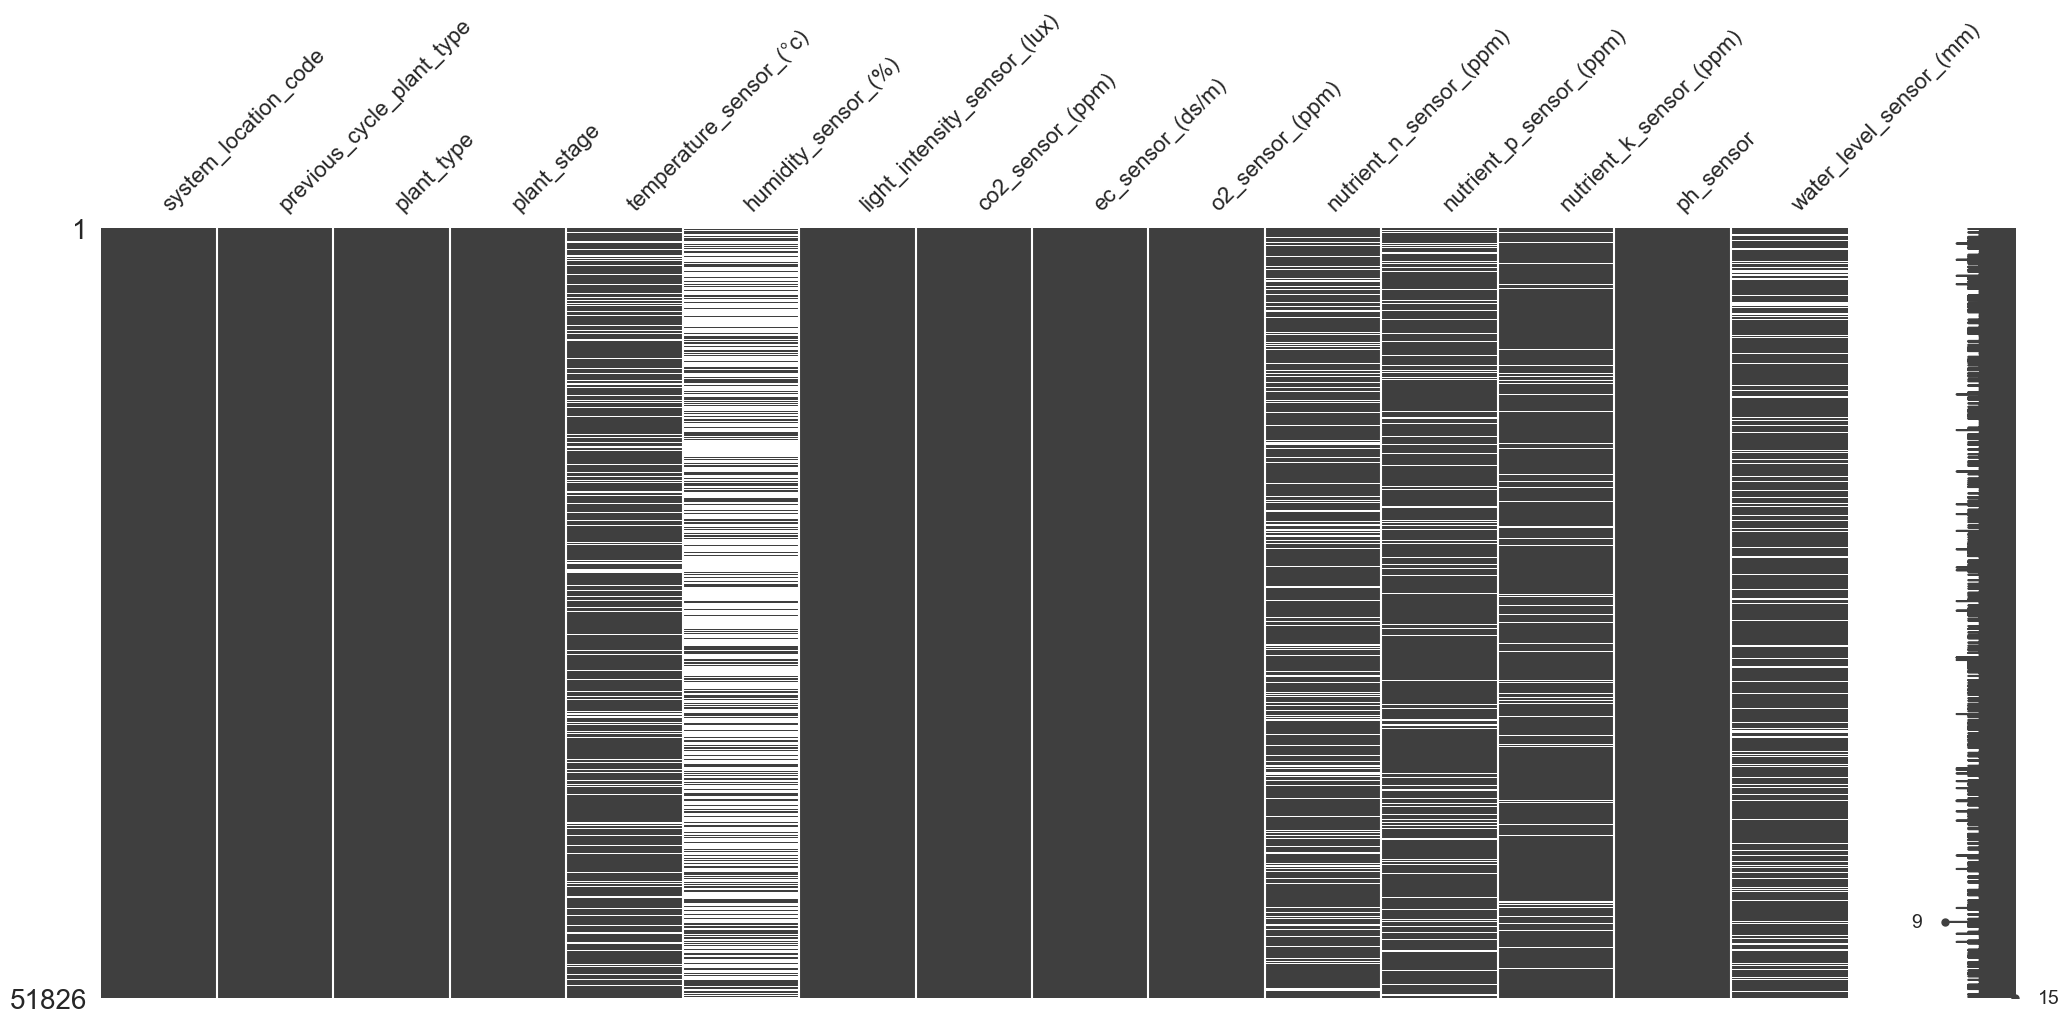

In [768]:
msno.matrix(clean_df.sort_values('system_location_code'))

Each bar represents each variable. The horizontal white lines represent the null values present. 
- data first sorted according to location, as by observation, most of the variables with null values are from sensors 
- assumed sensors to be the consistent at each location so I wanted to see if the null values are randomly distributed or related to observed values

Conclusion 
- Null values seem to be evenly scattered and not clustered at specific spots, indicating that the sensors at each location does not play a significant part in influencing nulls.
- Imputation seems to be an unbiased approach since nulls are randomly scattered 
- **Therefore, imputing missing values using the median is a reasonable approach to preserve the integrity of the data without introducing bias from the null patterns.**

#### Imputation

Although the Humidity variable has a **high proportion of missing values (67%)**, the summary statistics generated in section 2.1.2 suggest that the values are tightly distributed with no significant outliers. This implies that the existing data is relatively consistent and predictable. Given this, imputing the missing values with the median is a reasonable approach, as it will preserve the central tendency of the distribution without being unduly influenced by potential extreme values. This method is appropriate for handling the missing data while maintaining the overall structure of the variable."

Null Count before imputation

In [769]:
clean_df.isnull().sum()   

system_location_code                0
previous_cycle_plant_type           0
plant_type                          0
plant_stage                         0
temperature_sensor_(°c)          7850
humidity_sensor_(%)             35031
light_intensity_sensor_(lux)        0
co2_sensor_(ppm)                    0
ec_sensor_(ds/m)                    0
o2_sensor_(ppm)                     0
nutrient_n_sensor_(ppm)          9199
nutrient_p_sensor_(ppm)          5380
nutrient_k_sensor_(ppm)          3571
ph_sensor                           0
water_level_sensor_(mm)          7770
dtype: int64

In [770]:
cols_to_impute = ['temperature_sensor_(°c)', 'humidity_sensor_(%)', 'light_intensity_sensor_(lux)', 'nutrient_n_sensor_(ppm)', 'nutrient_p_sensor_(ppm)', 'nutrient_k_sensor_(ppm)', 'water_level_sensor_(mm)']

numerical_transformer = SimpleImputer(strategy='median')

clean_df[cols_to_impute] = numerical_transformer.fit_transform(clean_df[cols_to_impute])

Null Count After Imputation

In [771]:
clean_df.isnull().sum()   

system_location_code            0
previous_cycle_plant_type       0
plant_type                      0
plant_stage                     0
temperature_sensor_(°c)         0
humidity_sensor_(%)             0
light_intensity_sensor_(lux)    0
co2_sensor_(ppm)                0
ec_sensor_(ds/m)                0
o2_sensor_(ppm)                 0
nutrient_n_sensor_(ppm)         0
nutrient_p_sensor_(ppm)         0
nutrient_k_sensor_(ppm)         0
ph_sensor                       0
water_level_sensor_(mm)         0
dtype: int64

### 2.2.6 Plant Type Stage (new col) & plant type ordering

In [772]:
clean_df['plant_type_stage'] = clean_df['plant_type'].str.cat(clean_df['plant_stage'], sep='_')
clean_df.head()

,system_location_code,previous_cycle_plant_type,plant_type,plant_stage,temperature_sensor_(°c),humidity_sensor_(%),light_intensity_sensor_(lux),co2_sensor_(ppm),ec_sensor_(ds/m),o2_sensor_(ppm),nutrient_n_sensor_(ppm),nutrient_p_sensor_(ppm),nutrient_k_sensor_(ppm),ph_sensor,water_level_sensor_(mm),plant_type_stage
0,Zone_D,Herbs,Vine Crops,Maturity,23.34,68.74,454.0,937,1.82,4,161.0,64.0,201.0,6.1,28.150346,Vine Crops_Maturity
1,Zone_G,Herbs,Vine Crops,Vegetative,-24.16,63.14,441.0,938,2.13,6,161.0,53.0,214.0,6.5,31.000000,Vine Crops_Vegetative
2,Zone_F,Herbs,Herbs,Maturity,23.84,68.74,562.0,1246,1.21,8,228.0,79.0,292.0,6.4,26.000000,Herbs_Maturity
3,Zone_G,Herbs,Fruiting Vegetables,Vegetative,22.61,68.74,651.0,1346,1.96,6,158.0,50.0,289.0,6.6,26.000000,Fruiting Vegetables_Vegetative
4,Zone_B,Vine Crops,Leafy Greens,Seedling,22.88,68.74,144.0,812,2.76,5,61.0,19.0,168.0,5.5,28.000000,Leafy Greens_Seedling


In [773]:
category_order = ['Seedling', 'Vegetative', 'Maturity']

clean_df['plant_stage'] = pd.Categorical(clean_df['plant_stage'], categories=category_order, ordered=True)
clean_df.head()

,system_location_code,previous_cycle_plant_type,plant_type,plant_stage,temperature_sensor_(°c),humidity_sensor_(%),light_intensity_sensor_(lux),co2_sensor_(ppm),ec_sensor_(ds/m),o2_sensor_(ppm),nutrient_n_sensor_(ppm),nutrient_p_sensor_(ppm),nutrient_k_sensor_(ppm),ph_sensor,water_level_sensor_(mm),plant_type_stage
0,Zone_D,Herbs,Vine Crops,Maturity,23.34,68.74,454.0,937,1.82,4,161.0,64.0,201.0,6.1,28.150346,Vine Crops_Maturity
1,Zone_G,Herbs,Vine Crops,Vegetative,-24.16,63.14,441.0,938,2.13,6,161.0,53.0,214.0,6.5,31.000000,Vine Crops_Vegetative
2,Zone_F,Herbs,Herbs,Maturity,23.84,68.74,562.0,1246,1.21,8,228.0,79.0,292.0,6.4,26.000000,Herbs_Maturity
3,Zone_G,Herbs,Fruiting Vegetables,Vegetative,22.61,68.74,651.0,1346,1.96,6,158.0,50.0,289.0,6.6,26.000000,Fruiting Vegetables_Vegetative
4,Zone_B,Vine Crops,Leafy Greens,Seedling,22.88,68.74,144.0,812,2.76,5,61.0,19.0,168.0,5.5,28.000000,Leafy Greens_Seedling


### 2.2.7 Summary of data cleaning performed

1. Changed column names to snake_case.
2. Standardised casing of the categories in plant_type and plant_stage to similar forms, where the first letter of each word is capitalised and the rest lower case. 
3. Converted the date type of all 3 nutrients from object to numerical. 
4. Removed negative Light Intensities.
5. Imputed null values with the median
6. Created new column plant_type_stage (plant_type + plant_stage) to plot data visualisations in the later section.
7. Ordered the plant stages for more intuitive visualisations (Seedling -> Vegetative -> Maturity)


# 3. Univariate Exploration

In this section, data visualisation of single variables will be conducted to help better visualise and understand the data.

## 3.1 Temperature Conditions

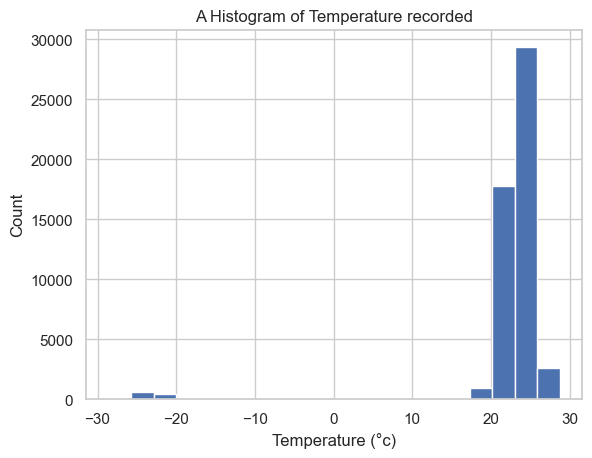

In [774]:
fig, ax = plt.subplots()

# Plot a histogram
ax.hist(clean_df['temperature_sensor_(°c)'], bins=20)
# Label
ax.set(title='A Histogram of Temperature recorded',
       xlabel='Temperature (°c)',
       ylabel='Count')
plt.show()

The temperature mostly lie around 15°c to 30°c with outliers in the -30°c to -20°c range. Moreover, temperatures of -30°c to -20°c are generally harmful to crops and this might be a case of a fault in the temperature sensors. I ruled out the possibility of a change in season as if so, it will be a very unbalanced dataset as we don't have intermediate values available. So I will potentially be removing the samples with negative temperature recorded. Next I will obtain the count of valid and invalid temperatures.

In [775]:
clean_df['temperature_faulty'] = clean_df['temperature_sensor_(°c)'].apply(lambda x: 'Faulty' if x < -10  else 'Valid')

# Get the count of each category
temperature_count = clean_df['temperature_faulty'].value_counts().reset_index()

# Rename the columns for better clarity
temperature_count.columns = ['Temperature Status', 'Count']

# Display the table
print(temperature_count)

  Temperature Status  Count
0              Valid  50720
1             Faulty   1106


Given that the temperature readings below 0°C are likely the result of sensor malfunctions and there is uncertainty regarding the exact cause of these faults, I have chosen to remove these samples from the dataset. This approach helps to mitigate any potential bias or inaccuracies introduced by the faulty readings, ensuring that the model is trained on more reliable and consistent data. By doing so, I aim to minimize uncertainties and improve the overall quality and trustworthiness of the dataset. Moreover, since it only occupies around 2% of the entire dataset, it will not affect the overall distribution significantly.

In [776]:
clean_df = clean_df[(clean_df['temperature_sensor_(°c)'] >= 0)]
clean_df = clean_df.drop("temperature_faulty", axis=1)
print("invalid temperatures removed")

invalid temperatures removed


Plotting the histogram of temperature again:

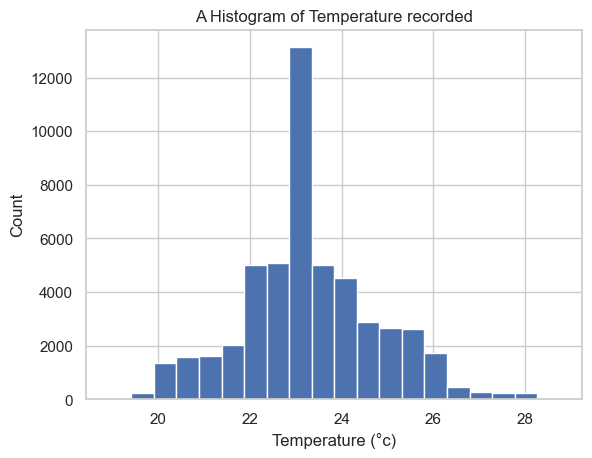

In [777]:
fig, ax = plt.subplots()

# Plot a histogram
ax.hist(clean_df['temperature_sensor_(°c)'], bins=20)
# Label
ax.set(title='A Histogram of Temperature recorded',
       xlabel='Temperature (°c)',
       ylabel='Count')
plt.show()

Majority lies at the median as expected due to the imputation and seems fairly symmetrical about the median/mode.

## 3.2 Plant Type/Stage
I will plot 4 barplots involving previous_cycle_plant_type, plant_type, plant_stage and plant_type_stage

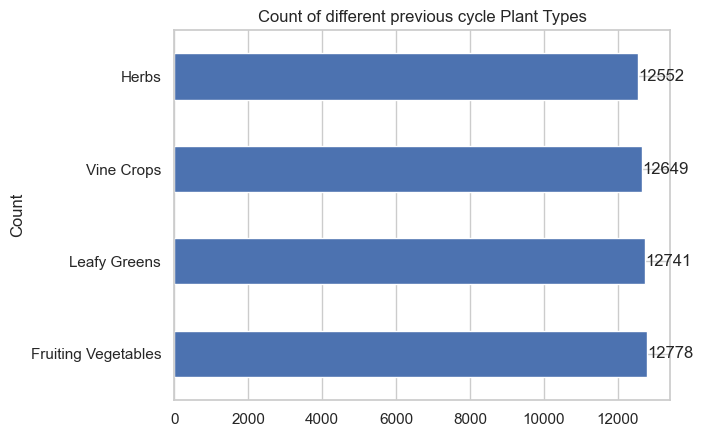

In [778]:
category_to_plot = 'previous_cycle_plant_type'

# Plotting the bar chart for the specific category
ax = clean_df[category_to_plot].value_counts().plot.barh()

ax.set(title=f'Count of different previous cycle Plant Types',
       ylabel='Count')


for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

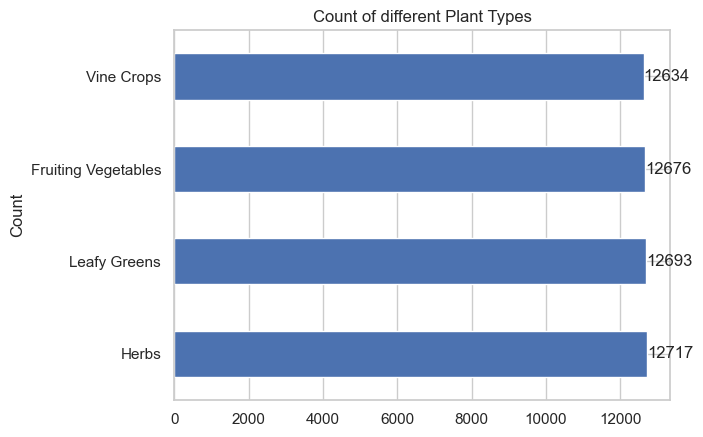

In [779]:
category_to_plot = 'plant_type'

# Plotting the bar chart for the specific category
ax = clean_df[category_to_plot].value_counts().plot.barh()

ax.set(title=f'Count of different Plant Types',
       ylabel='Count')


for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

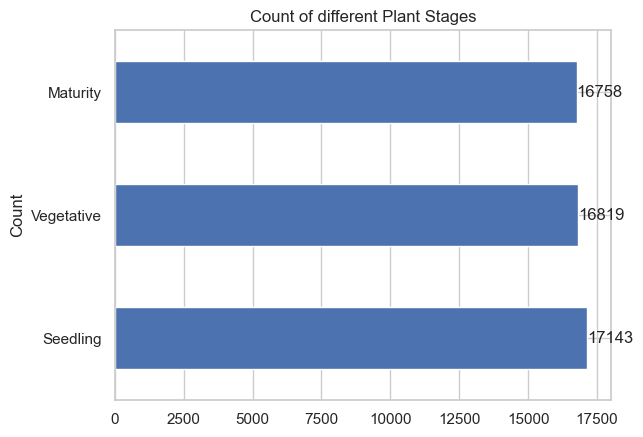

In [780]:
category_to_plot = 'plant_stage'

# Plotting the bar chart for the specific category
ax = clean_df[category_to_plot].value_counts().plot.barh()

ax.set(title=f'Count of different Plant Stages',
       ylabel='Count')


for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

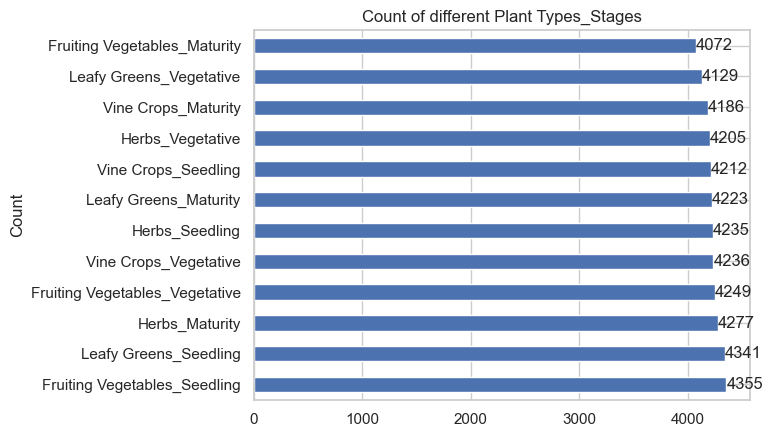

In [781]:
category_to_plot = 'plant_type_stage'

# Plotting the bar chart for the specific category
ax = clean_df[category_to_plot].value_counts().plot.barh()

ax.set(title=f'Count of different Plant Types_Stages',
       ylabel='Count')


for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

The categories are **evenly distributed** across the dataset, ensuring equal representation of each class. This balanced distribution is beneficial as it helps prevent any category from dominating the model, allowing it to learn patterns more effectively and generalize better to unseen data.

## 3.3 Location

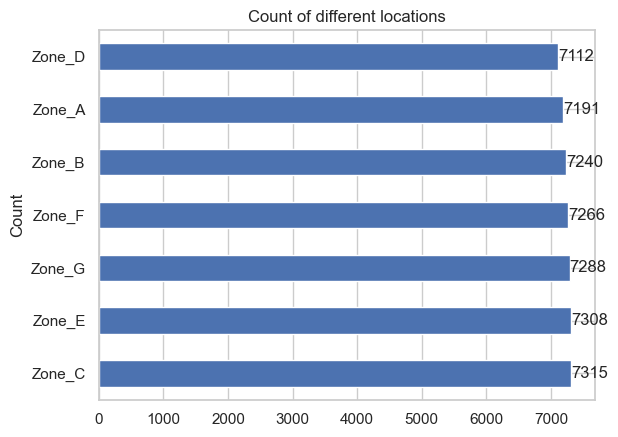

In [782]:
category_to_plot = 'system_location_code'

# Plotting the bar chart for the specific category
ax = clean_df[category_to_plot].value_counts().plot.barh()

ax.set(title=f'Count of different locations',
       ylabel='Count')


for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

Locations where the crops grew are evenly distributed which is a good sign as different zones are equally represented.

# 4. Multivariate Exploration
Now I will to visualise distributions between multiple categories/variables.

## 4.1 Zone vs Plant Type/Stage

### 4.1.1 HeatMap 

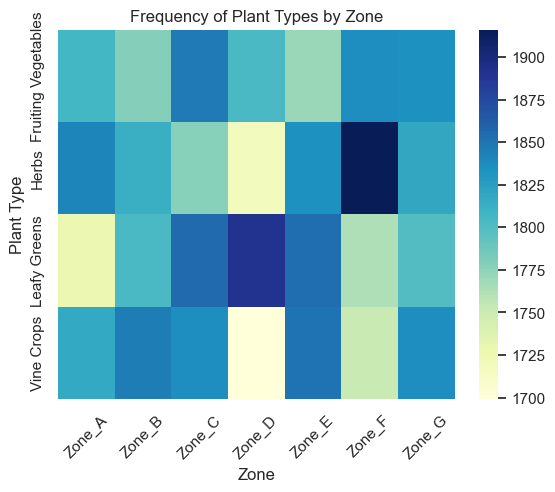

In [783]:
heatmap_data = clean_df.pivot_table(index='plant_type', columns=['system_location_code'], aggfunc='size', fill_value=0)

sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Frequency of Plant Types by Zone')
plt.xlabel('Zone')
plt.ylabel('Plant Type')
plt.xticks(rotation=45)
plt.show()


The count of the different plant types at each zone ranges from around 1700 to 1900 which is not a very big range in itself. So data recorded of plant types and different zones can be said to be fairly evenly distributed. The ones that stand out are Herbs and Zone_F with the highest count and Vine Crops at Zone_D with the lowest count.

/var/folders/23/d90ldmr169xb4hv44q2hbq6c0000gn/T/ipykernel_97038/2663415972.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = clean_df.pivot_table(index='plant_stage', columns=['system_location_code'], aggfunc='size', fill_value=0)


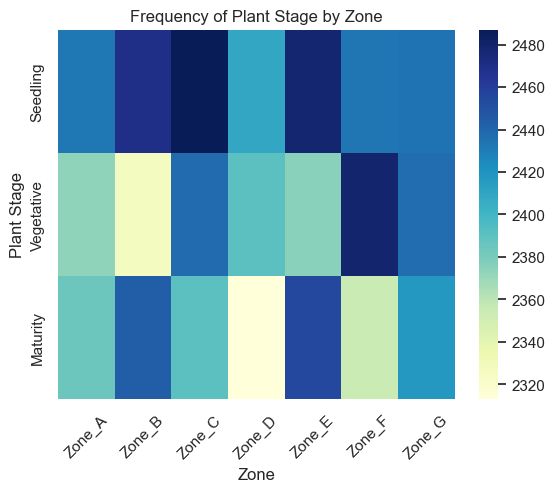

In [784]:
heatmap_data = clean_df.pivot_table(index='plant_stage', columns=['system_location_code'], aggfunc='size', fill_value=0)

sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Frequency of Plant Stage by Zone')
plt.xlabel('Zone')
plt.ylabel('Plant Stage')
plt.xticks(rotation=45)
plt.show()


It is interesting to note that the variation in counts of plant stages at each zone are different. This indicates that there are a number plants that are shifted to different locations at each stage instead of growing at the same zone from seedling to maturity. However, there isn't sufficient data to indicate the unique plant id to track its location shift throughout its growth process.

### 4.1.2 Grouped Barplots 


/var/folders/23/d90ldmr169xb4hv44q2hbq6c0000gn/T/ipykernel_97038/574633640.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='system_location_code', y='Count', hue='plant_type', data=grouped_data, ci=None)


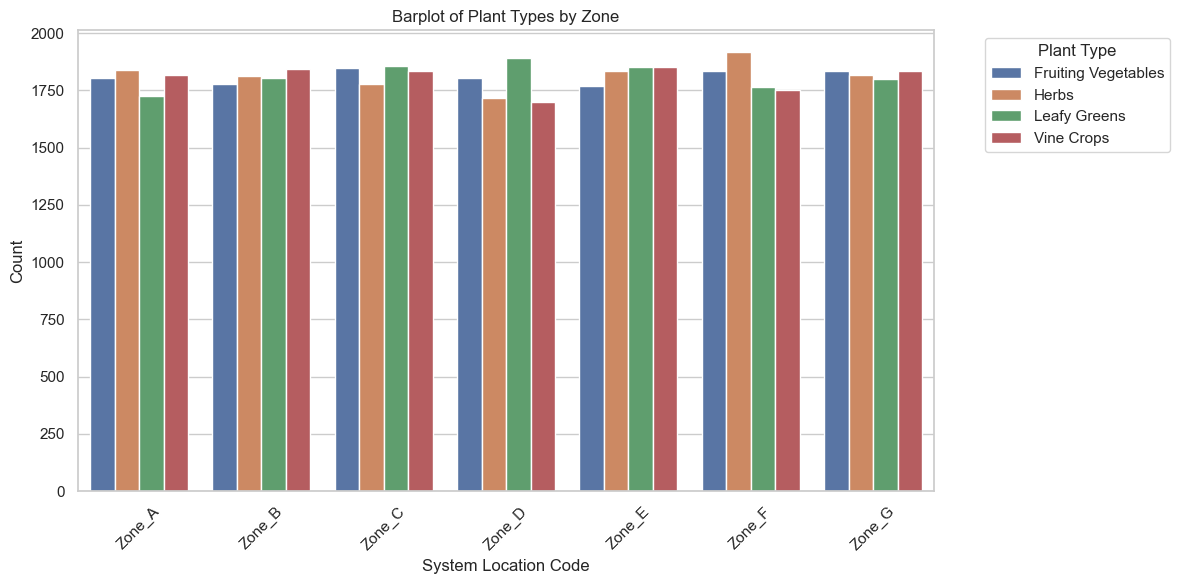

In [785]:
grouped_data = clean_df.groupby(['system_location_code', 'plant_type']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='system_location_code', y='Count', hue='plant_type', data=grouped_data, ci=None)

plt.title('Barplot of Plant Types by Zone')
plt.xlabel('System Location Code')
plt.ylabel('Count')
plt.legend(title='Plant Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/23/d90ldmr169xb4hv44q2hbq6c0000gn/T/ipykernel_97038/3026028222.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = clean_df.groupby(['system_location_code', 'plant_stage']).size().reset_index(name='Count')
/var/folders/23/d90ldmr169xb4hv44q2hbq6c0000gn/T/ipykernel_97038/3026028222.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='system_location_code', y='Count', hue='plant_stage', data=grouped_data, ci=None)


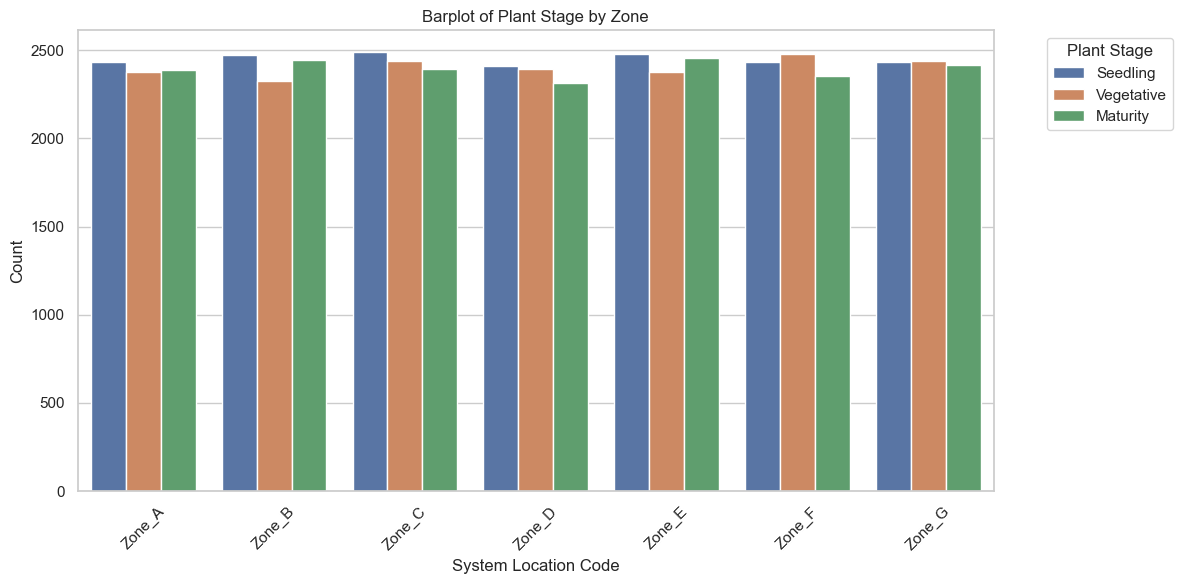

In [786]:
grouped_data = clean_df.groupby(['system_location_code', 'plant_stage']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='system_location_code', y='Count', hue='plant_stage', data=grouped_data, ci=None)

plt.title('Barplot of Plant Stage by Zone')
plt.xlabel('System Location Code')
plt.ylabel('Count')
plt.legend(title='Plant Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/23/d90ldmr169xb4hv44q2hbq6c0000gn/T/ipykernel_97038/4101797650.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='system_location_code', y='Count', hue='plant_type_stage', data=grouped_data, ci=None)


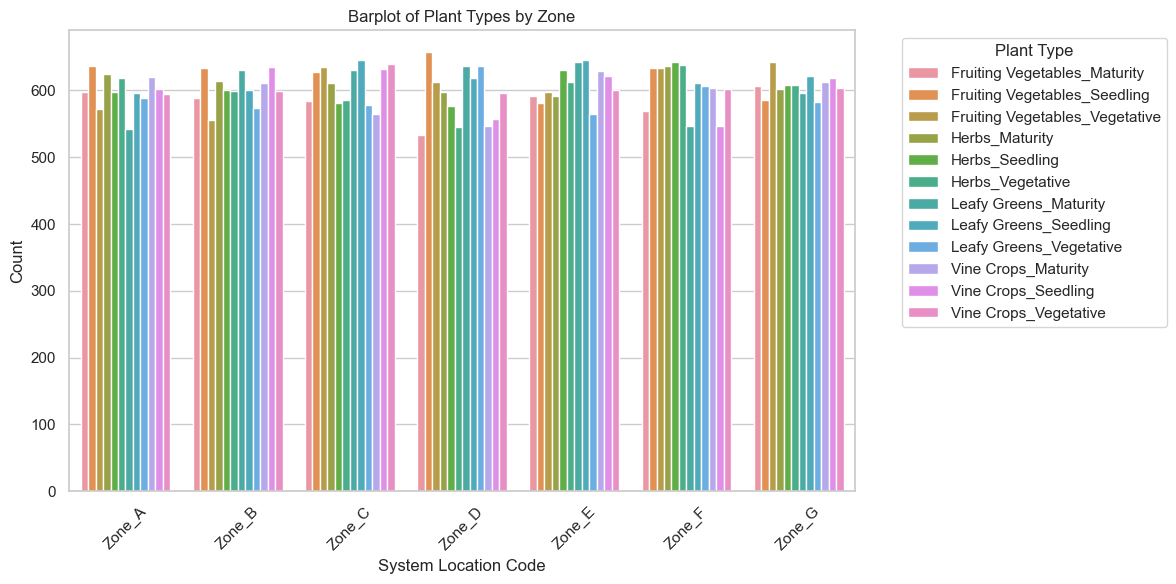

In [787]:
grouped_data = clean_df.groupby(['system_location_code', 'plant_type_stage']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='system_location_code', y='Count', hue='plant_type_stage', data=grouped_data, ci=None)

plt.title('Barplot of Plant Types by Zone')
plt.xlabel('System Location Code')
plt.ylabel('Count')
plt.legend(title='Plant Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

According to all 3 barplots, the data seems to be fairly evenly distributed across the different zones. Except for Zone_D which has the most variation among all combinations of plant type and stage.

## 4.2 Temperature and its other variables

<Axes: >

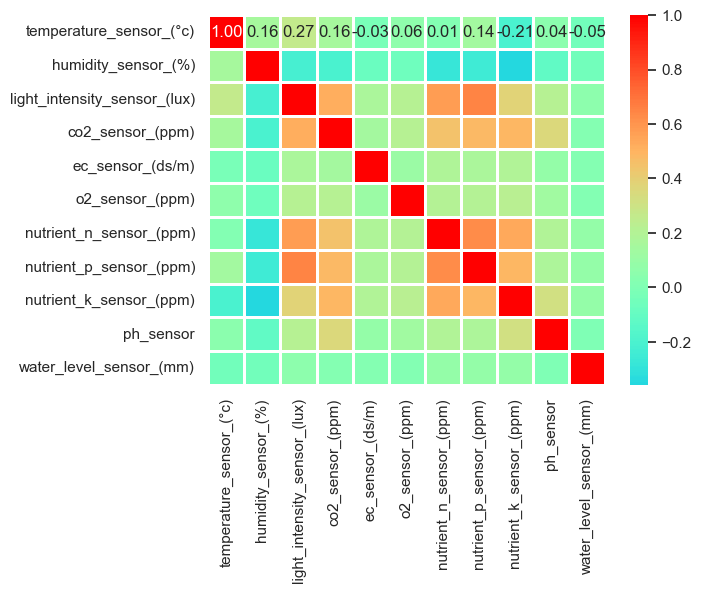

In [788]:
# Select only numerical columns
numerical_df = clean_df.select_dtypes(include=['number'])

# Plot the heatmap for the correlation matrix of numerical columns
sns.heatmap(numerical_df.corr(), annot=True, 
            fmt='.2f',
            linewidths=1, center=0, cmap='rainbow')

Temperature doesn't seem to be largely correlated with any of the numerical values. Which mean that temperature does not have a strong linear association with the other variables.

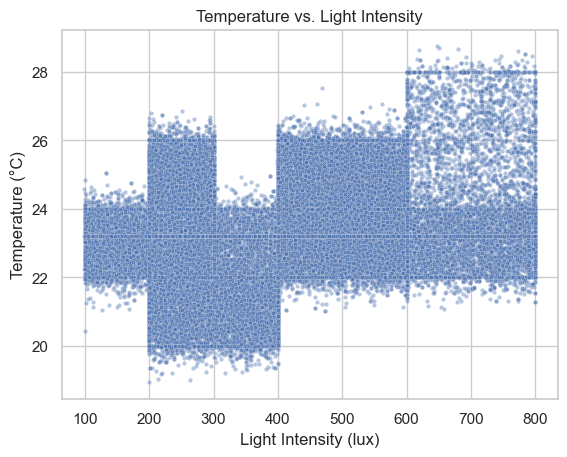

In [789]:
sns.scatterplot(x='light_intensity_sensor_(lux)', y='temperature_sensor_(°c)', 
                data=clean_df, alpha=0.4, s=10)  # Adjust alpha & size
plt.title('Temperature vs. Light Intensity')
plt.xlabel('Light Intensity (lux)')
plt.ylabel('Temperature (°C)')
plt.show()


They appear as bar-like silhouettes at every 100 lux interval. This suggests that within each 100 lux range, the temperature tends to follow a certain spread. However, higher temperatures are predominantly observed at higher light intensities, likely due to the correlation between light intensity (or irradiation) and heat. At lower light intensities, the temperature seems to be more invariant, possibly because other factors, such as humidity, are playing a more significant role in influencing temperature when the light is low.

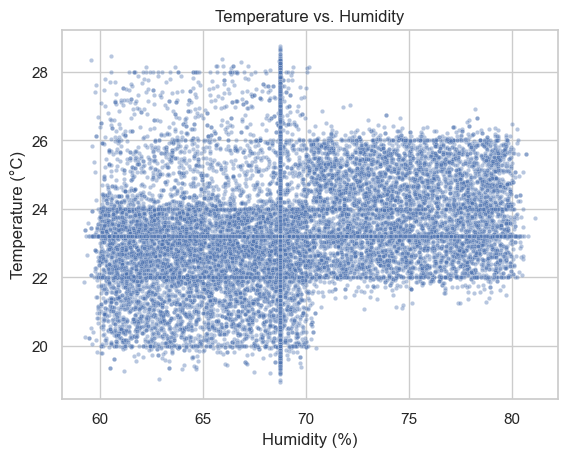

In [790]:
sns.scatterplot(x='humidity_sensor_(%)', y='temperature_sensor_(°c)', data=clean_df, alpha=0.4, s=10)
plt.title('Temperature vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()


There is a clear vertical and horizontal line cutting across the plot, which is likely due to the imputation of null values. This results in a significant concentration of points at the median values of both humidity and temperature. **Interestingly, it can be observed that higher temperatures tend to coincide with lower humidity.** Which is contrary to domain knowledge where a higher humidity generally leads to higher surrounding temperatures. 

## 4.3 Numerical columns vs plant type/stage

Based on the above 3 grouped barplots, all the possible combination of plant stages and types have been grown in each zone

In [791]:
numerical_cols = ['temperature_sensor_(°c)', 'humidity_sensor_(%)', 'light_intensity_sensor_(lux)', 'co2_sensor_(ppm)', 'ec_sensor_(ds/m)',
       'o2_sensor_(ppm)', 'nutrient_n_sensor_(ppm)', 'nutrient_p_sensor_(ppm)',
       'nutrient_k_sensor_(ppm)', 'ph_sensor', 'water_level_sensor_(mm)']

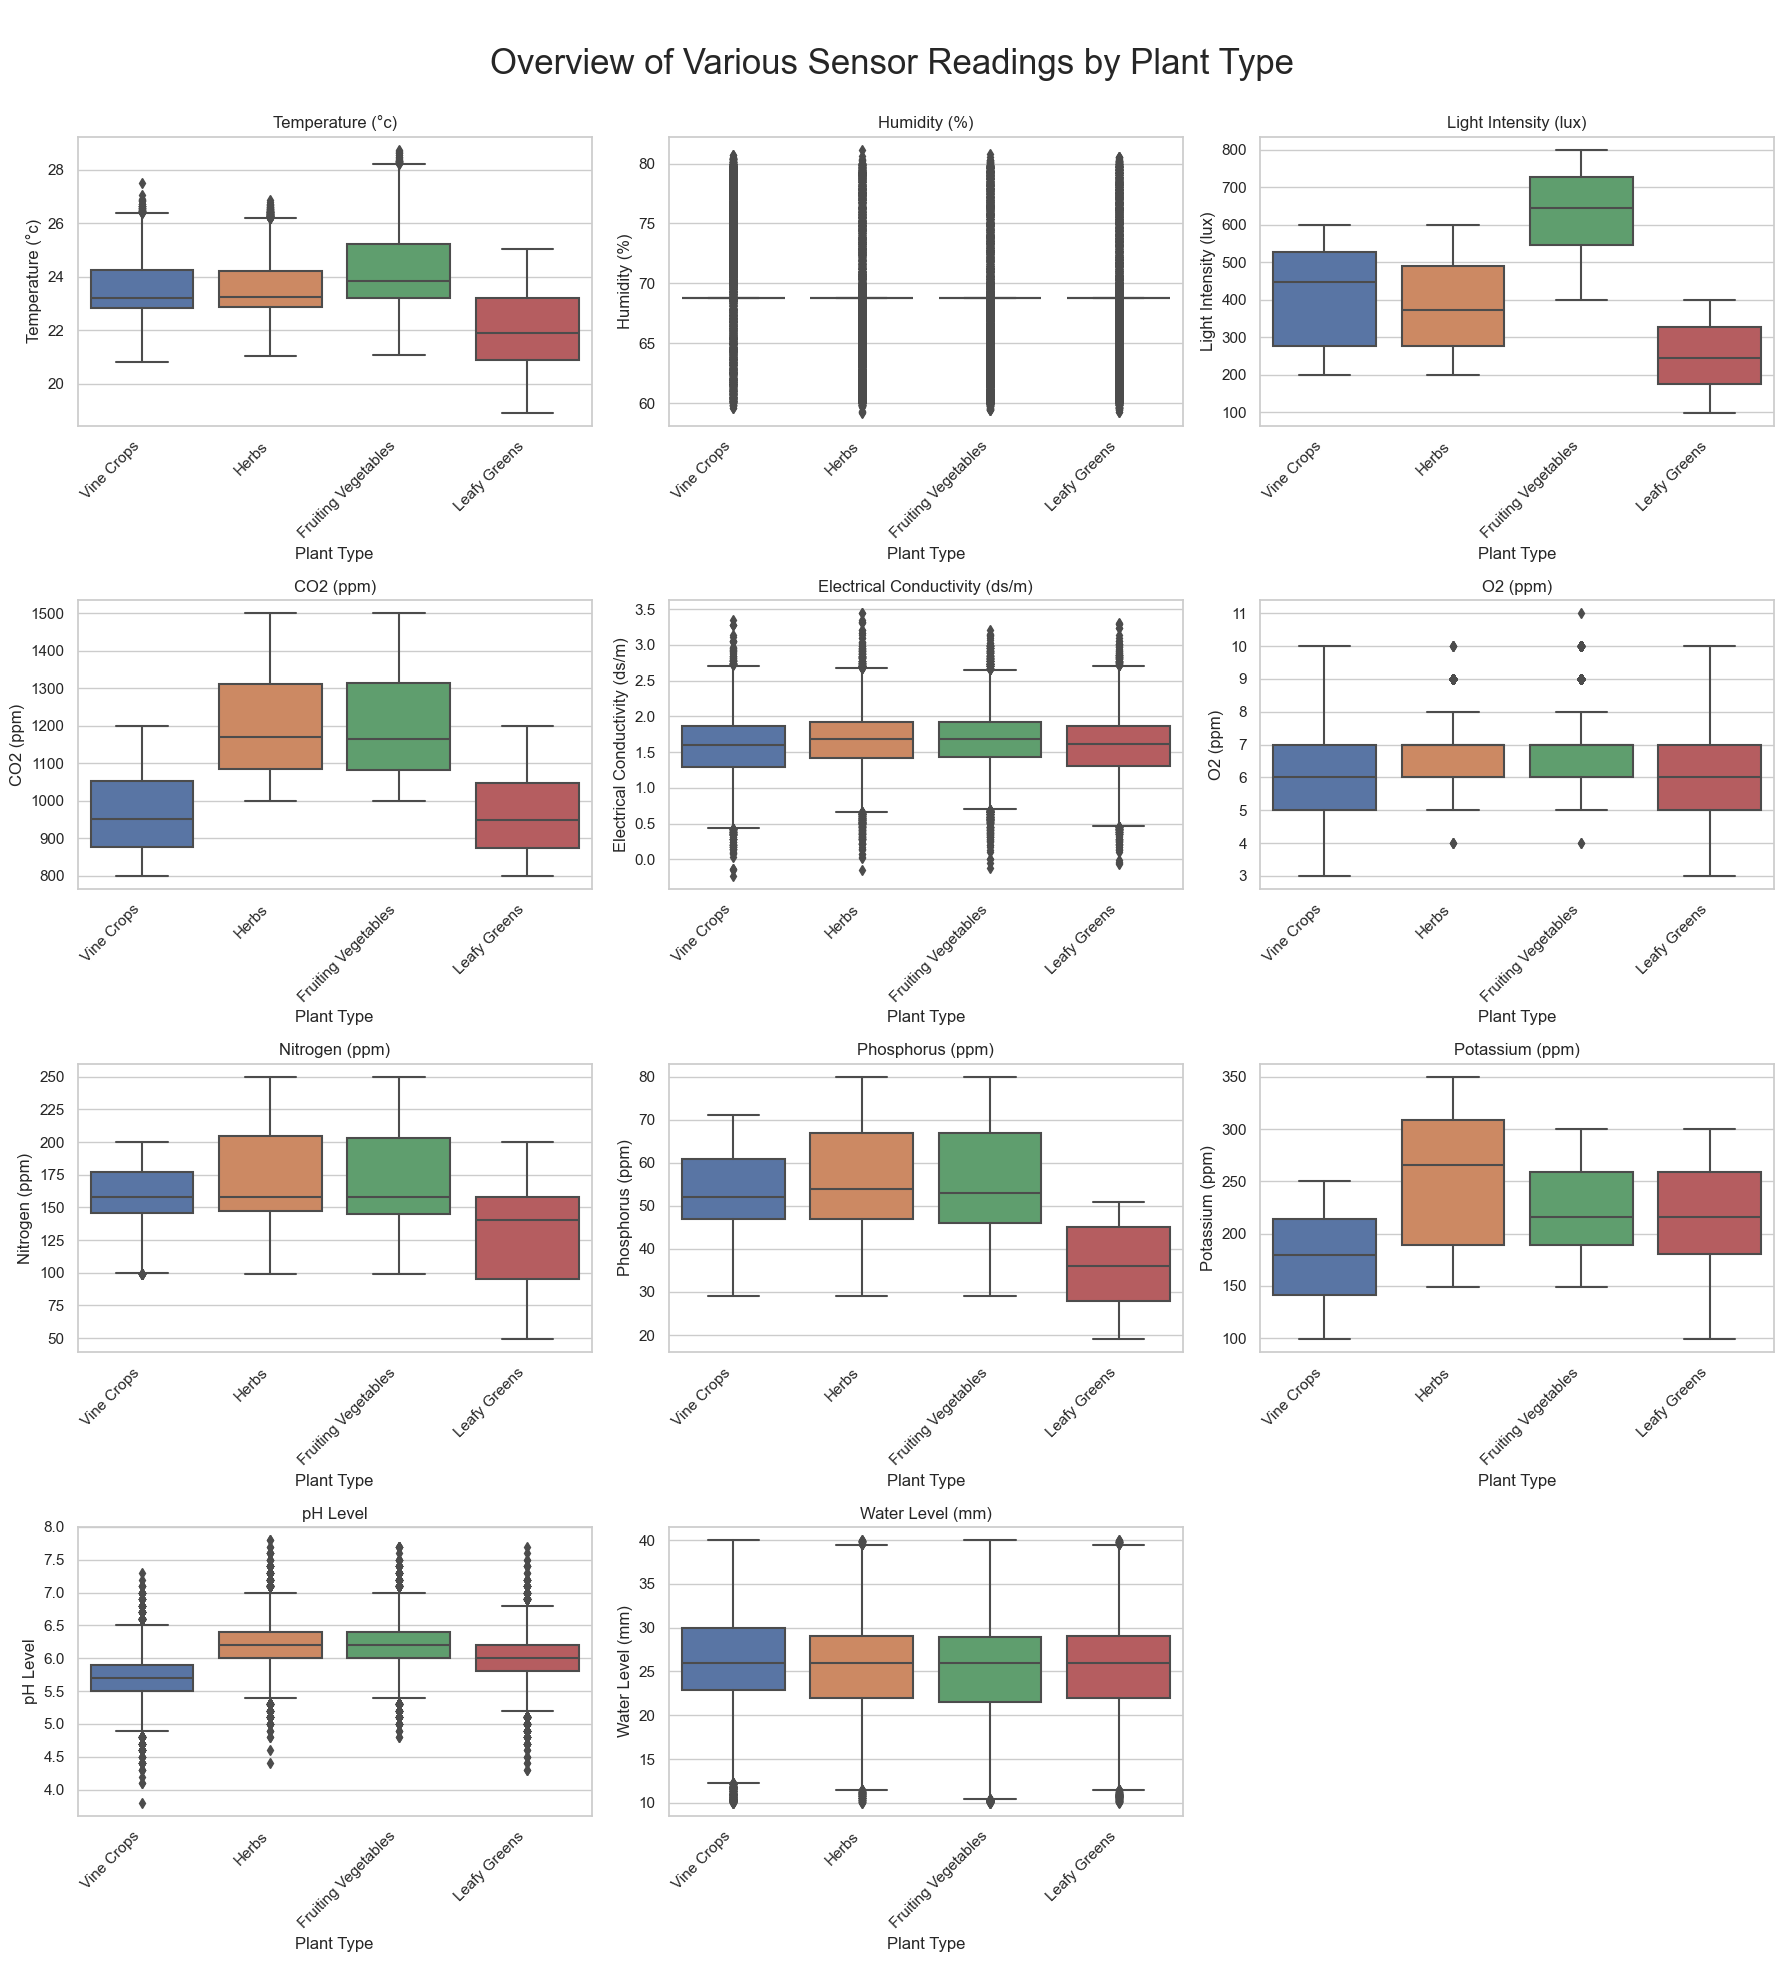

In [792]:

num_vars = len(numerical_cols)
num_cols = 3  # 3 plots per row
num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate needed rows (ceiling division)

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

# Nice labels for the plots
labels = {
    'temperature_sensor_(°c)': 'Temperature (°c)',
    'humidity_sensor_(%)' : 'Humidity (%)',
    'light_intensity_sensor_(lux)' : 'Light Intensity (lux)',
    'co2_sensor_(ppm)' : 'CO2 (ppm)',
    'ec_sensor_(ds/m)': 'Electrical Conductivity (ds/m)',
    'o2_sensor_(ppm)' : 'O2 (ppm)',
    'ph_sensor' : "pH Level",
    'water_level_sensor_(mm)' : 'Water Level (mm)',
    'nutrient_n_sensor_(ppm)': 'Nitrogen (ppm)',
    'nutrient_p_sensor_(ppm)': 'Phosphorus (ppm)',
    'nutrient_k_sensor_(ppm)': 'Potassium (ppm)'
}

# Create each subplot
for i, var in enumerate(numerical_cols):
    sns.boxplot(x='plant_type', y=var, data=clean_df, ax=axes[i])
    axes[i].set_title(labels.get(var, var))
    axes[i].set_xlabel('Plant Type')
    axes[i].set_ylabel(labels.get(var, var))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

# Hide any unused subplots
for i in range(num_vars, len(axes)):
    axes[i].set_visible(False)

fig.suptitle('\nOverview of Various Sensor Readings by Plant Type\n', fontsize=25)
plt.tight_layout()
plt.show()

### Observations
| Variable               | Description                                                                                      |
|---------------------------|--------------------------------------------------------------------------------------------------|
| **Temperature**           | Significantly lower for Leafy greens                                                             |
| **Humidity**              | Little to no variability, makes sense as the null count for this variable was previously 67%     |
| **Light Intensity**       | Fruiting Vegetables stands out with the highest median while Leafy Greens with the lowest      |
| **CO2**                   | Relatively the same for Herbs and Fruiting Vegetables, and relatively the same for Vine Crops and Leafy Greens. The former having higher CO2 values. |
| **Electrical Conductivity** | Relatively the same, thus might not be a good predictor of plant type                           |
| **O2**                    | Wider range for Vine crops and leafy greens. Smaller range for Fruiting Vegetables and Herbs      |
| **Nitrogen and Phosphorous** | Leafy Greens have the lowest levels while the others are relatively the same                   |
| **Potassium**             | Vine Crops have the lowest median while Herbs have the highest levels                             |
| **pH Level**              | All seem to be very mildly acidic to close to neutral, with Vine Crops being the most acidic      |
| **Water Level**           | Relatively the same, thus might not be a good predictor of plant type                             |

**to note: Vine Crops and Leafy Greens have variables where it stands out however, for Herbs and Fruiting Vegetables, the medians for all variables are around the same except for Potassium levels where Herbs have a higher median from Fruiting Vegetables and the other types**

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

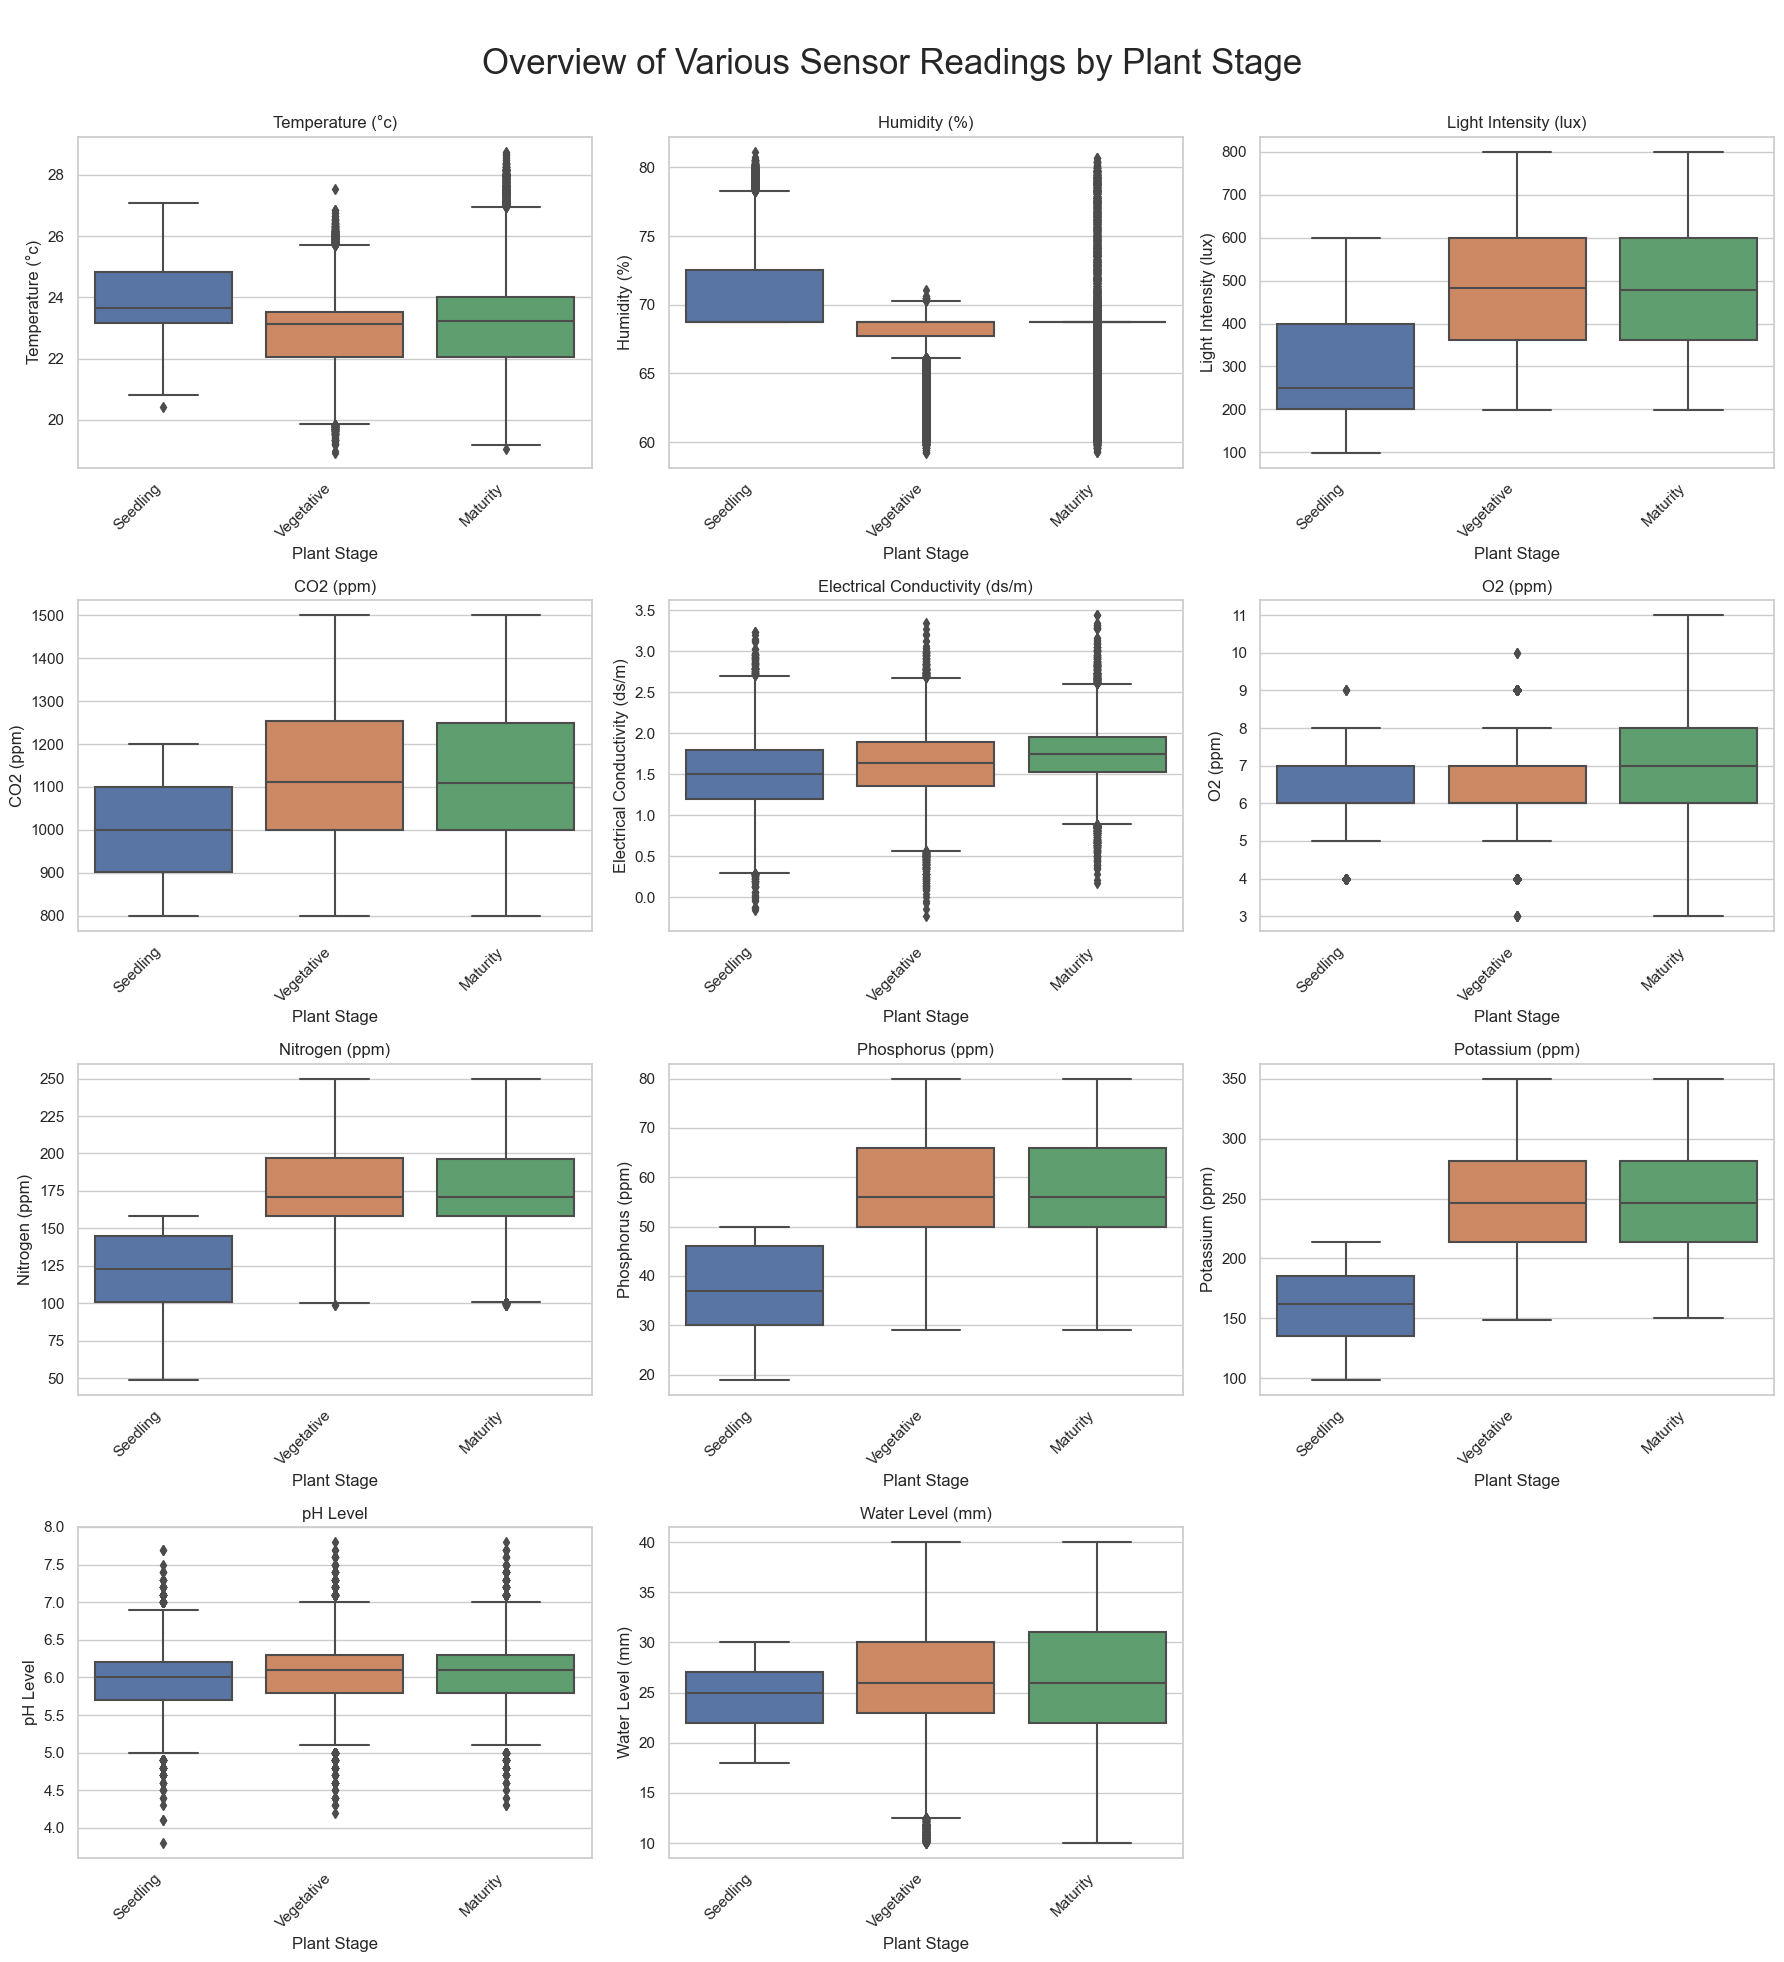

In [793]:

num_vars = len(numerical_cols)
num_cols = 3  # 3 plots per row
num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate needed rows (ceiling division)

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

# Nice labels for the plots
labels = {
    'temperature_sensor_(°c)': 'Temperature (°c)',
    'humidity_sensor_(%)' : 'Humidity (%)',
    'light_intensity_sensor_(lux)' : 'Light Intensity (lux)',
    'co2_sensor_(ppm)' : 'CO2 (ppm)',
    'ec_sensor_(ds/m)': 'Electrical Conductivity (ds/m)',
    'o2_sensor_(ppm)' : 'O2 (ppm)',
    'ph_sensor' : "pH Level",
    'water_level_sensor_(mm)' : 'Water Level (mm)',
    'nutrient_n_sensor_(ppm)': 'Nitrogen (ppm)',
    'nutrient_p_sensor_(ppm)': 'Phosphorus (ppm)',
    'nutrient_k_sensor_(ppm)': 'Potassium (ppm)'
}

# Create each subplot
for i, var in enumerate(numerical_cols):
    sns.boxplot(x='plant_stage', y=var, data=clean_df, ax=axes[i])
    axes[i].set_title(labels.get(var, var))
    axes[i].set_xlabel('Plant Stage')
    axes[i].set_ylabel(labels.get(var, var))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

# Hide any unused subplots
for i in range(num_vars, len(axes)):
    axes[i].set_visible(False)

fig.suptitle('\nOverview of Various Sensor Readings by Plant Stage\n', fontsize=25)
plt.tight_layout()
plt.show()

### Observations
| Variable               | Description                                                                                      |
|---------------------------|--------------------------------------------------------------------------------------------------|
| **Temperature**           | Significantly lower for Seedling                                                            |
| **Humidity**              | Little to no variability, makes sense as the null count for this variable was previously 67%     |
| **Light Intensity**       | Lowest for Seedling. Makes sense as early stage requires less light |
| **CO2**                   | Lowest for Seedling. Seedlings consume lesser CO2 than the other 2 stages. |
| **Electrical Conductivity** | Relatively the same, thus might not be a good predictor of plant stage                           |
| **O2**                    | Wider range for Maturity level      |
| **N/P/K** | Lowest for Seedling. Vegatative and Maturity relatively the same.          |
| **pH Level**              | Most around neutral and mildly acidic for all 3 stages. |
| **Water Level**           | Relatively the same, thus might not be a good predictor of plant stage                             |

**To note: the medians values of all the variables are similar for Vegetative and Maturity State except for O2 level where the median for maturity is slightly higher than that of vegagtative**

# 5. Conclusion
To sum up, this dataset is largely balanced with each category being almost equally balanced. Only samples with invalid temperature and light intensity values are removed as it may bias our analysis. For the rest of the missing values, they are all numerical so I imputed it with the median values. 

In observing how the plant type and stage varies with the other factors, a combination of multi variables may be able to generate a good prediction but one variable alone cannot. As upon analysing the box plot, for each factor only 1-2 types/stages stand out while the others are very similar. 

For Temperature, there are lesser numerical factors which may be very helpful to predict this due to the low correlation values. But when plotting the scatter plots, for example the temperature against light intensity, visually there seems to be a more interesting trend as the points appeared clustered in vertical bars. 